# Импорт библиотек

In [61]:
import os

import dill
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Этап 1: Подготовительная работа

## 1.1. Чтение данных

Действия:

- Прочитать данные из предоставленных файлов (ga_sessions.pkl и ga_hits.pkl).
- Использовать оптимизированные методы чтения, например, Dask, или загружать данные частями с помощью chunksize (при необходимости).

In [64]:
# Чтение CSV файла
ga_sessions = pd.read_csv('./data/ga_sessions.csv', low_memory=False)
ga_hits = pd.read_csv('./data/ga_hits-002.csv')

## 1.2. Ознакомление с атрибутами

Действия:
- Посмотреть структуру данных: типы столбцов, примеры данных, объёмы строк и столбцов. Использовать методы:
    - df.info()
    - df.head()
    - df.describe()

In [66]:
# Быстрый осмотр структуры данных
print("GA Sessions:")
print(ga_sessions.info())

print("\nGA Hits:")
print(ga_hits.info())

GA Sessions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB
None

GA Hits:
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [67]:
ga_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [68]:
ga_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [69]:
ga_sessions.describe()

,visit_number
count,1.860042e+06
mean,2.712804e+00
std,1.182907e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,5.640000e+02


In [70]:
ga_hits.describe()

,hit_time,hit_number,event_value
count,6.566148e+06,1.572647e+07,0.0
mean,2.091050e+05,2.356715e+01,NaN
std,4.032110e+05,2.887713e+01,NaN
min,0.000000e+00,1.000000e+00,NaN
25%,2.412000e+04,7.000000e+00,NaN
50%,8.994100e+04,1.500000e+01,NaN
75%,2.195352e+05,2.900000e+01,NaN
max,1.315688e+07,5.000000e+02,NaN


## 1.3. Оценка полноты данных

Действия:
- Проверить пропущенные значения с использованием:
    - `isna().sum()`
    - Написать функцию для анализа пропусков.
- Проанализировать, какие данные можно восстановить, а какие требуют очистки.

In [72]:
""" Проанализируем пропуски, уникальные значения, дубликаты (с детализацией),
    типы данных. Выведем статистику по занимаемой памяти"""

def values_summary(df, title):
    total_rows = len(df)
    missing_summary = pd.DataFrame({
        "Количество пропусков": df.isna().sum(),
        "Процент пропусков": (df.isna().sum() / total_rows * 100).round(2),
        "Количество уникальных значений": df.nunique(),
        "Процент уникальных значений": (df.nunique() / total_rows * 100).round(2)
    })
    
    print(f"\n=== Анализ пропусков и уникальных значений для {title} ===")
    print(missing_summary)
    return missing_summary


def analyze_duplicates(df, title):
    duplicate_count = df.duplicated().sum()
    print(f"\n=== Анализ дубликатов для {title} ===")
    print(f"Количество дубликатов: {duplicate_count}")
    if duplicate_count > 0:
        print("\nПримеры дубликатов:")
        print(df[df.duplicated()].head())


def analyze_memory_usage(df, title):
    memory_usage = df.memory_usage(deep=True).sum() / 1024**2
    print(f"\n=== Использование памяти для {title} ===")
    print(f"Память: {memory_usage:.2f} MB")


def analyze_data_types(df, title):
    print(f"\n=== Типы данных для {title} ===")
    print(df.dtypes)
    print("\nСтолбцы с типом 'object' и примеры данных:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"- {col}: {df[col].unique()[:5]}")  # Примеры до 5 уникальных значений


# Анализ GA Sessions
ga_sessions_missing = values_summary(ga_sessions, "GA Sessions")
analyze_duplicates(ga_sessions, "GA Sessions")
analyze_memory_usage(ga_sessions, "GA Sessions")
analyze_data_types(ga_sessions, "GA Sessions")

# Анализ GA Hits
ga_hits_missing = values_summary(ga_hits, "GA Hits")
analyze_duplicates(ga_hits, "GA Hits")
analyze_memory_usage(ga_hits, "GA Hits")
analyze_data_types(ga_hits, "GA Hits")



=== Анализ пропусков и уникальных значений для GA Sessions ===
                          Количество пропусков  Процент пропусков  \
session_id                                   0               0.00   
client_id                                    0               0.00   
visit_date                                   0               0.00   
visit_time                                   0               0.00   
visit_number                                 0               0.00   
utm_source                                  97               0.01   
utm_medium                                   0               0.00   
utm_campaign                            219603              11.81   
utm_adcontent                           335615              18.04   
utm_keyword                            1082061              58.17   
device_category                              0               0.00   
device_os                              1070138              57.53   
device_brand                           

## 1.4. Приведение данных в удобный вид

Действия:

- Выполнить обработку для:
    - целевых действий,
    - источников трафика,
    - маркировки рекламы в соц сетях. 
- Привести данные к нужным типам:
    - Числовые — оптимизировать с помощью astype (например, `int32`, `float32`).
    - Текстовые — преобразовать в категориальные (`category`).
- Удалить ненужные столбцы.

In [74]:

# Функция для классификации целевых действий
def classify_event_action(df, target_actions):
    df['event_action'] = df['event_action'].apply(
        lambda x: 'Appropriate' if x in target_actions else ('Inappropriate' if pd.notna(x) else x)
    )
    return df

# Функция для классификации источников трафика
def classify_utm_medium(df, organic_sources):
    df['utm_medium'] = df['utm_medium'].replace(organic_sources, 'Organic traffic')
    df['utm_medium'] = df['utm_medium'].apply(
        lambda x: 'Paid traffic' if pd.notna(x) and x != 'Organic traffic' else x
    )
    return df

# Функция для классификации рекламы в социальных сетях
def classify_utm_source(df, social_media_sources):
    df['utm_source'] = df['utm_source'].apply(
        lambda x: 'Social media advertisement' if x in social_media_sources else 'Other sources'
    )
    return df

# Преобразование данных
def preprocess_data(ga_hits, ga_sessions):
    # Список целевых действий
    target_actions = [
        'sub_car_claim_click', 'sub_car_claim_submit_click',
        'sub_open_dialog_click', 'sub_custom_question_submit_click',
        'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
        'sub_car_request_submit_click'
    ]
    
    # Список органических источников трафика
    organic_traffic = ['organic', 'referral', '(none)']
    
    # Список рекламы в социальных сетях
    social_media_adv = [
        'QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
        'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'
    ]
    
    # Классификация целевых действий
    ga_hits = classify_event_action(ga_hits, target_actions)
    
    # Классификация источников трафика
    ga_sessions = classify_utm_medium(ga_sessions, organic_traffic)
    
    # Классификация рекламы в социальных сетях
    ga_sessions = classify_utm_source(ga_sessions, social_media_adv)
    
    return ga_hits, ga_sessions

# Обработка данных
ga_hits, ga_sessions = preprocess_data(ga_hits, ga_sessions)

# Проверка результатов
print("\nРезультат классификации event_action:")
print(ga_hits['event_action'].value_counts(dropna=False))

print("\nРезультат классификации utm_medium:")
print(ga_sessions['utm_medium'].value_counts(dropna=False))

print("\nРезультат классификации utm_source:")
print(ga_sessions['utm_source'].value_counts(dropna=False))



Результат классификации event_action:
event_action
Inappropriate    15621562
Appropriate        104908
Name: count, dtype: int64

Результат классификации utm_medium:
utm_medium
Paid traffic       1344383
Organic traffic     515659
Name: count, dtype: int64

Результат классификации utm_source:
utm_source
Other sources                 1585815
Social media advertisement     274227
Name: count, dtype: int64


In [75]:
def optimize_dataframe(df, category_threshold=0.1):
    """
    Оптимизирует датафрейм:
    - Уменьшает размер числовых данных.
    - Преобразует текстовые данные в категориальные, если уникальных значений < category_threshold.
    
    Параметры:
    - category_threshold: Порог уникальности (доля уникальных значений от общего числа строк).
    """
    initial_memory = df.memory_usage(deep=True).sum() / 1024**2

    # Оптимизация числовых столбцов
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')

    # Преобразование текстовых данных в категориальные
    for col in df.select_dtypes(include=['object']).columns:
        num_unique = df[col].nunique()
        num_total = len(df[col])
        unique_ratio = num_unique / num_total
        if unique_ratio < category_threshold:
            df[col] = df[col].astype('category')

    final_memory = df.memory_usage(deep=True).sum() / 1024**2

    print(f"Память до оптимизации: {initial_memory:.2f} MB")
    print(f"Память после оптимизации: {final_memory:.2f} MB")
    print(f"Сокращение памяти: {initial_memory - final_memory:.2f} MB ({(initial_memory - final_memory) / initial_memory * 100:.2f}%)\n")

    return df

# Применение с порогом 10%
ga_sessions = optimize_dataframe(ga_sessions, category_threshold=0.1)
ga_hits = optimize_dataframe(ga_hits, category_threshold=0.1)


Память до оптимизации: 1753.10 MB
Память после оптимизации: 339.86 MB
Сокращение памяти: 1413.24 MB (80.61%)

Память до оптимизации: 9925.11 MB
Память после оптимизации: 1884.24 MB
Сокращение памяти: 8040.87 MB (81.02%)



# Этап 2: Разведочный анализ данных (EDA)

## 2.1. Очистка данных

Действия:

Удалить дубликаты:

Заполнить или удалить пропущенные значения:
- Для числовых данных — медиана или среднее.
- Для текстовых данных — наиболее частое значение.

In [78]:
# Удаление дубликатов
ga_sessions = ga_sessions.drop_duplicates()
ga_hits = ga_hits.drop_duplicates()

print(f"Дубликаты удалены. Осталось строк в GA Sessions: {len(ga_sessions)}")
print(f"Дубликаты удалены. Осталось строк в GA Hits: {len(ga_hits)}")

# Анализ пропущенных значений
def missing_values_summary(df, title):
    total_rows = len(df)
    missing_summary = pd.DataFrame({
        "Количество пропусков": df.isna().sum(),
        "Процент пропусков": (df.isna().sum() / total_rows * 100).round(2)
    })
    print(f"\nПропущенные значения для {title}:")
    print(missing_summary)
    return missing_summary

ga_sessions_missing = missing_values_summary(ga_sessions, "GA Sessions")
ga_hits_missing = missing_values_summary(ga_hits, "GA Hits")

# Удаление столбцов с пропусками > 50%
missing_threshold = 0.5
columns_to_drop_ga_sessions = ga_sessions_missing[
    ga_sessions_missing["Процент пропусков"] > missing_threshold * 100
].index.tolist()
ga_sessions.drop(columns=columns_to_drop_ga_sessions, inplace=True, errors='ignore')

columns_to_drop_ga_hits = ga_hits_missing[
    ga_hits_missing["Процент пропусков"] > missing_threshold * 100
].index.tolist()
ga_hits.drop(columns=columns_to_drop_ga_hits, inplace=True, errors='ignore')

# Удаление ненужных столбцов
columns_to_remove_ga_sessions = ["utm_keyword", "device_model", "device_screen_resolution"]
columns_to_remove_ga_hits = ["hit_number", "event_label"]

ga_sessions.drop(columns=columns_to_remove_ga_sessions, inplace=True, errors='ignore')
ga_hits.drop(columns=columns_to_remove_ga_hits, inplace=True, errors='ignore')

print("\nОставшиеся столбцы в GA Sessions:")
print(ga_sessions.columns)

print("\nОставшиеся столбцы в GA Hits:")
print(ga_hits.columns)


Дубликаты удалены. Осталось строк в GA Sessions: 1860042
Дубликаты удалены. Осталось строк в GA Hits: 15726470

Пропущенные значения для GA Sessions:
                          Количество пропусков  Процент пропусков
session_id                                   0               0.00
client_id                                    0               0.00
visit_date                                   0               0.00
visit_time                                   0               0.00
visit_number                                 0               0.00
utm_source                                   0               0.00
utm_medium                                   0               0.00
utm_campaign                            219603              11.81
utm_adcontent                           335615              18.04
utm_keyword                            1082061              58.17
device_category                              0               0.00
device_os                              1070138            

## 2.2: Анализ распределений

Цели:

- Построить гистограммы для числовых атрибутов.
- Построить бар-чарты для категориальных атрибутов.
- Понять основные паттерны в данных и выявить аномалии.

In [80]:
# Список необходимых столбцов
# Оставляем только нужные столбцы
ga_sessions_filtered = ga_sessions[['session_id', 'utm_source', 'utm_medium', 'geo_city', 'device_category']]
ga_hits_filtered = ga_hits[['session_id', 'event_action', 'event_category']]


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\2729449423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis', legend=False)


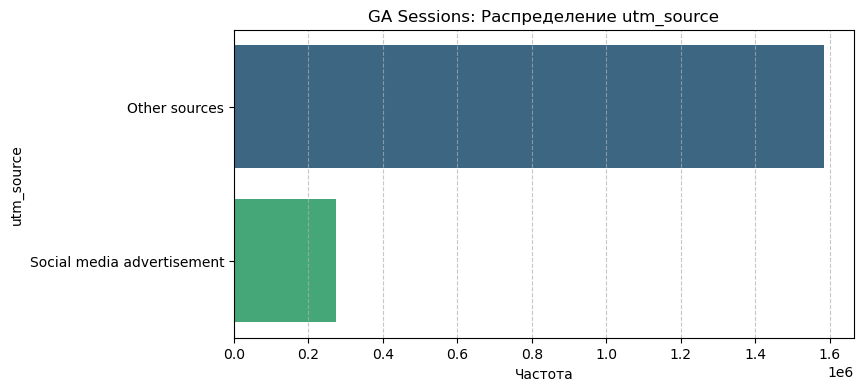

C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\2729449423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis', legend=False)


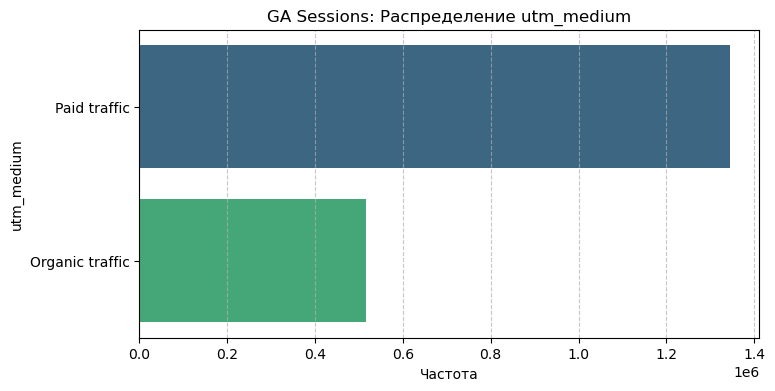

C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\2729449423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis', legend=False)


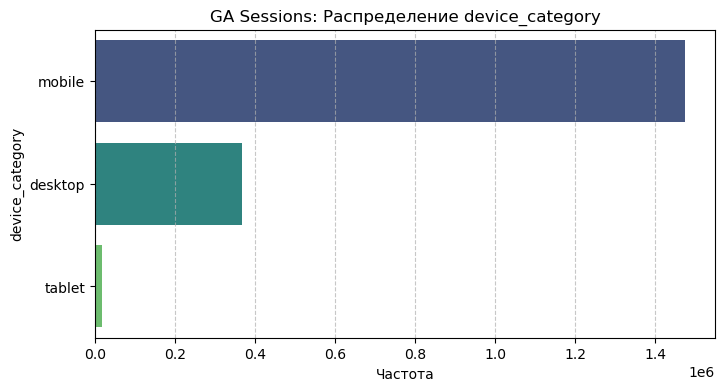

C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\2729449423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis', legend=False)


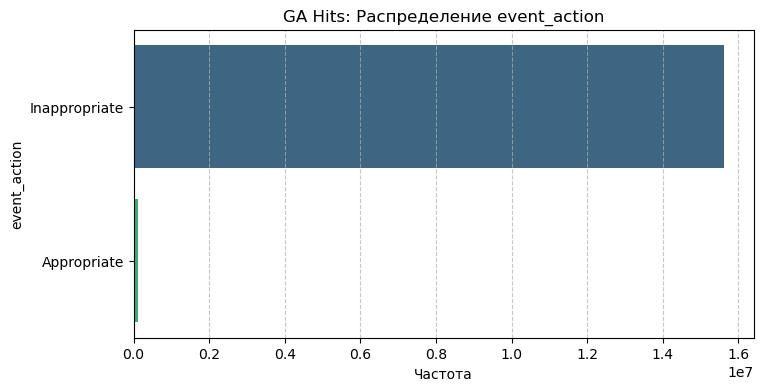

In [81]:

# Создадим графики распределения только для ключевых категориальных столбцов.

# Функция для визуализации категориальных данных
def plot_categorical_distribution(df, col, title):
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis', legend=False)
    plt.title(f"{title}: Распределение {col}")
    plt.xlabel("Частота")
    plt.ylabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Визуализация ключевых категориальных столбцов
plot_categorical_distribution(ga_sessions_filtered, 'utm_source', 'GA Sessions')
plot_categorical_distribution(ga_sessions_filtered, 'utm_medium', 'GA Sessions')
plot_categorical_distribution(ga_sessions_filtered, 'device_category', 'GA Sessions')
plot_categorical_distribution(ga_hits_filtered, 'event_action', 'GA Hits')
# plot_categorical_distribution(ga_hits_filtered, 'event_category', 'GA Hits')


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\3968593038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


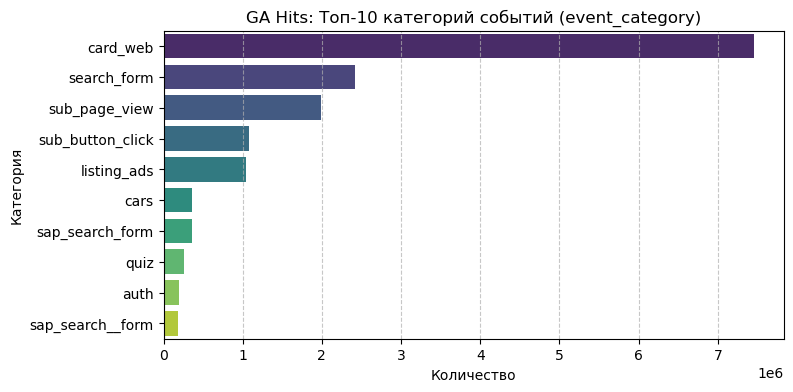

In [82]:
# Выбираем топ-10 категорий
top_event_categories = ga_hits_filtered['event_category'].value_counts().head(10)

# Визуализация
plt.figure(figsize=(8, 4))
sns.barplot(
    x=top_event_categories.values, 
    y=top_event_categories.index, 
    order=top_event_categories.index,  # Указываем порядок, чтобы гарантировать сортировку
    palette='viridis'
)
plt.title("GA Hits: Топ-10 категорий событий (event_category)")
plt.xlabel("Количество")
plt.ylabel("Категория")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\2906173208.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values,


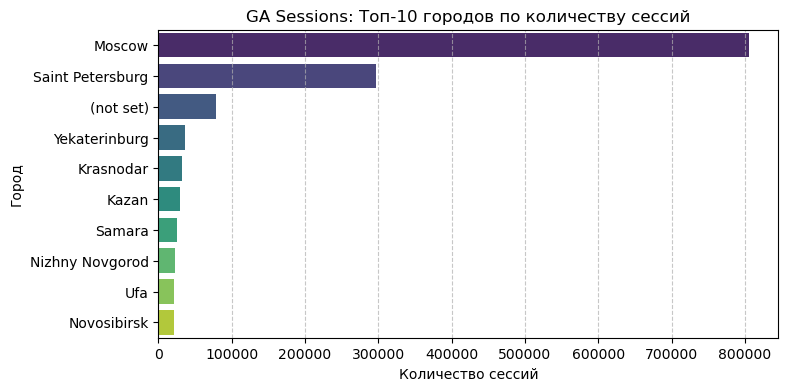

In [83]:
# Топ-10 городов по количеству сессий
top_cities = ga_sessions_filtered['geo_city'].value_counts().head(10)

# Визуализация
plt.figure(figsize=(8, 4))
sns.barplot(x=top_cities.values,
            y=top_cities.index,
            order=top_cities.index,
            palette='viridis')
plt.title("GA Sessions: Топ-10 городов по количеству сессий")
plt.xlabel("Количество сессий")
plt.ylabel("Город")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## 2.3 Распределение ключевых атрибутов и их связи.

- Построить матрицу корреляций для числовых атрибутов (если они остались после очистки).
- Посмотреть, как ключевые атрибуты (например, utm_source, geo_city, device_category) связаны с целевыми событиями (event_action).
- Возможно, выявить перекосы в данных или аномалии.

In [85]:
# Проверяем, есть ли числовые данные
numerical_cols = ga_sessions_filtered.select_dtypes(include=['int', 'float']).columns

if len(numerical_cols) > 0:
    # Строим матрицу корреляций
    correlation_matrix = ga_sessions_filtered[numerical_cols].corr()

    if not correlation_matrix.empty:
        # Визуализация матрицы корреляций
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Матрица корреляций для GA Sessions")
        plt.show()
    else:
        print("Корреляционная матрица пуста. Нет данных для анализа.")
else:
    print("Нет числовых столбцов для построения матрицы корреляций.")


Нет числовых столбцов для построения матрицы корреляций.


In [86]:
# Проверяем, какие столбцы можно удалить
columns_to_drop = [
    'device_screen_resolution', 'device_model', 'device_browser',
    'utm_keyword', 'geo_country'
]

# Удаляем столбцы, только если они есть в DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in ga_sessions.columns]

if existing_columns_to_drop:
    ga_sessions = ga_sessions.drop(columns=existing_columns_to_drop, axis=1)
    print(f"Удалены столбцы: {existing_columns_to_drop}")
else:
    print("Столбцы для удаления уже отсутствуют или не найдены.")


Удалены столбцы: ['device_browser', 'geo_country']


In [87]:
# Проверяем числовые данные перед построением гистограммы
numerical_cols = ga_sessions.select_dtypes(include=['int', 'float']).columns

if len(numerical_cols) > 0:
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(ga_sessions[col], bins=30, kde=True, color='blue')
        plt.title(f"Распределение {col}")
        plt.xlabel(col)
        plt.ylabel("Частота")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
else:
    print("Нет числовых столбцов для анализа распределения.")


Нет числовых столбцов для анализа распределения.


In [88]:
# Проверяем наличие числовых столбцов
numerical_cols = ga_sessions.select_dtypes(include=['int', 'float']).columns

if len(numerical_cols) > 1:  # Корреляция возможна, если больше 1 числового столбца
    correlation_matrix = ga_sessions[numerical_cols].corr()

    if not correlation_matrix.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Матрица корреляций для GA Sessions")
        plt.show()
    else:
        print("Матрица корреляций пуста.")
else:
    print("Недостаточно числовых столбцов для построения матрицы корреляций.")


Недостаточно числовых столбцов для построения матрицы корреляций.


Пропускаем столбец session_id, так как уникальных значений слишком много (1860042).
Пропускаем столбец client_id, так как уникальных значений слишком много (1391719).
Пропускаем столбец visit_date, так как уникальных значений слишком много (226).
Пропускаем столбец visit_time, так как уникальных значений слишком много (85318).


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\4040384711.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


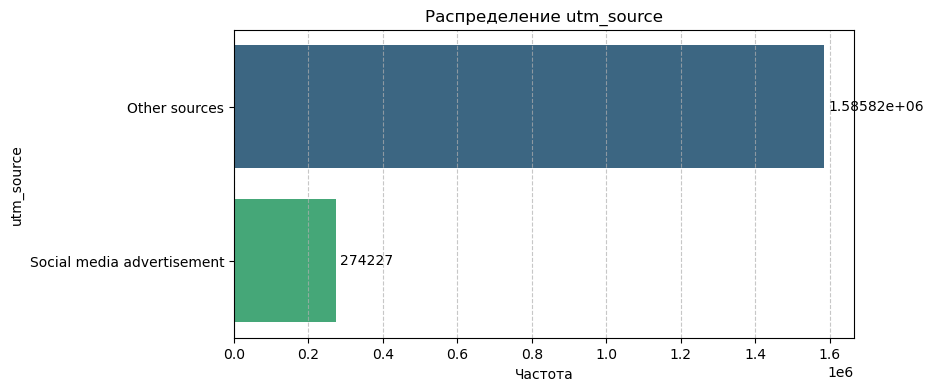

C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\4040384711.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


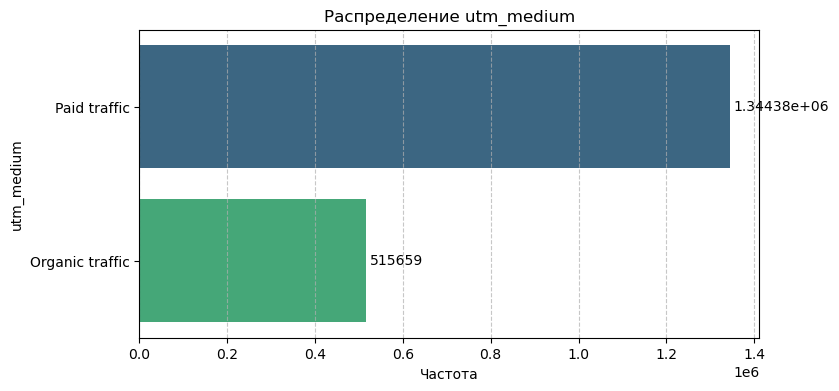

Пропускаем столбец utm_campaign, так как уникальных значений слишком много (412).
Пропускаем столбец utm_adcontent, так как уникальных значений слишком много (286).


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\4040384711.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


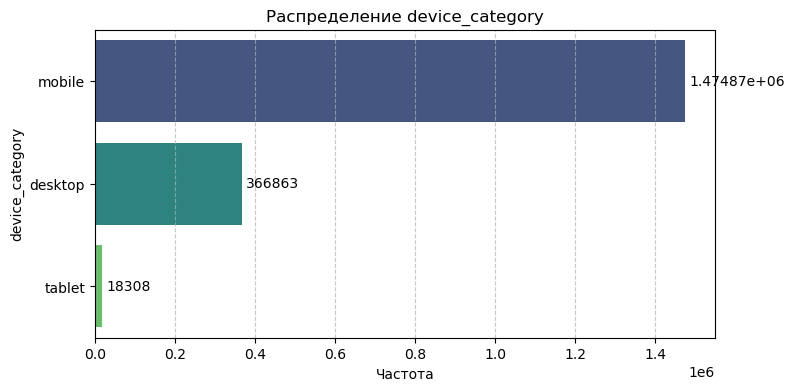

Пропускаем столбец device_brand, так как уникальных значений слишком много (205).
Пропускаем столбец geo_city, так как уникальных значений слишком много (2548).


In [89]:
# Категориальные столбцы
categorical_cols = ga_sessions.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    for col in categorical_cols:
        unique_values = ga_sessions[col].nunique()
        if unique_values <= 50:  # Например, визуализируем, если уникальных значений <= 50
            plt.figure(figsize=(8, 4))
            ax = sns.countplot(
                y=ga_sessions[col],
                order=ga_sessions[col].value_counts().index,
                palette='viridis'
            )
            plt.title(f"Распределение {col}")
            plt.xlabel("Частота")
            plt.ylabel(col)
            plt.grid(axis='x', linestyle='--', alpha=0.7)

            # Добавление подписей данных
            for container in ax.containers:
                ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

            plt.show()
        else:
            print(f"Пропускаем столбец {col}, так как уникальных значений слишком много ({unique_values}).")
else:
    print("Нет категориальных столбцов для анализа.")


In [90]:
# Пример проверки для гипотезы о CR органического и платного трафика
if 'utm_medium' in ga_sessions.columns and 'session_id' in ga_hits.columns:
    organic_sessions = ga_sessions[ga_sessions['utm_medium'] == 'Organic traffic']
    paid_sessions = ga_sessions[ga_sessions['utm_medium'] == 'Paid traffic']

    if not organic_sessions.empty and not paid_sessions.empty:
        # Расчет CR
        organic_cr = len(ga_hits[(ga_hits['session_id'].isin(organic_sessions['session_id'])) &
                                 (ga_hits['event_action'] == 'Appropriate')]) / len(organic_sessions)

        paid_cr = len(ga_hits[(ga_hits['session_id'].isin(paid_sessions['session_id'])) &
                              (ga_hits['event_action'] == 'Appropriate')]) / len(paid_sessions)

        print(f"CR для органического трафика: {organic_cr:.2%}")
        print(f"CR для платного трафика: {paid_cr:.2%}")
    else:
        print("Недостаточно данных для расчета CR органического и платного трафика.")
else:
    print("Отсутствуют необходимые столбцы для анализа.")


CR для органического трафика: 8.08%
CR для платного трафика: 4.55%


# Этап 3: Проверка гипотез

## 3.1. Проверка гипотез

Гипотезы:
- Гипотеза 1: Органический трафик не отличается от платного с точки зрения CR.
- Гипотеза 2: Трафик с мобильных устройств не отличается от десктопных устройств с точки зрения CR.
- Гипотеза 3: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из других регионов с точки зрения CR.

In [93]:


def calculate_cr(sessions, hits, traffic_type):
    """
    Расчет CR для указанного типа трафика.
    """
    traffic_sessions = sessions[sessions['utm_medium'] == traffic_type]
    unique_sessions = traffic_sessions['session_id'].nunique()

    conversions = hits[(hits['session_id'].isin(traffic_sessions['session_id'])) &
                       (hits['event_action'] == 'Appropriate')]['session_id'].nunique()

    cr = conversions / unique_sessions if unique_sessions > 0 else 0
    return cr, conversions, unique_sessions

# Расчет CR для органического и платного трафика
organic_cr, organic_conversions, organic_sessions_count = calculate_cr(ga_sessions, ga_hits, 'Organic traffic')
paid_cr, paid_conversions, paid_sessions_count = calculate_cr(ga_sessions, ga_hits, 'Paid traffic')

print(f"Органический трафик: CR={organic_cr:.2%}, Конверсий={organic_conversions}, Визитов={organic_sessions_count}")
print(f"Платный трафик: CR={paid_cr:.2%}, Конверсий={paid_conversions}, Визитов={paid_sessions_count}")

# Проверка гипотезы с помощью теста хи-квадрат
contingency_table = [
    [organic_conversions, organic_sessions_count - organic_conversions],
    [paid_conversions, paid_sessions_count - paid_conversions]
]

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("\nРезультаты теста хи-квадрат:")
print(f"Статистика хи-квадрат: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Различие статистически значимо. Отвергаем нулевую гипотезу.")
else:
    print("Нет статистически значимого различия. Нулевая гипотеза не отвергается.")


Органический трафик: CR=4.04%, Конверсий=20812, Визитов=515659
Платный трафик: CR=2.19%, Конверсий=29502, Визитов=1344383

Результаты теста хи-квадрат:
Статистика хи-квадрат: 4801.7954
P-value: 0.0000
Различие статистически значимо. Отвергаем нулевую гипотезу.


In [94]:

def calculate_cr(sessions, hits, traffic_type):
    """
    Расчет CR для указанного типа трафика.
    """
    traffic_sessions = sessions[sessions['utm_medium'] == traffic_type]
    unique_sessions = traffic_sessions['session_id'].nunique()

    conversions = hits[(hits['session_id'].isin(traffic_sessions['session_id'])) &
                       (hits['event_action'] == 'Appropriate')]['session_id'].nunique()

    cr = conversions / unique_sessions if unique_sessions > 0 else 0
    return cr, conversions, unique_sessions

# Расчет CR для органического и платного трафика
organic_cr, organic_conversions, organic_sessions_count = calculate_cr(ga_sessions, ga_hits, 'Organic traffic')
paid_cr, paid_conversions, paid_sessions_count = calculate_cr(ga_sessions, ga_hits, 'Paid traffic')

print(f"Органический трафик: CR={organic_cr:.2%}, Конверсий={organic_conversions}, Визитов={organic_sessions_count}")
print(f"Платный трафик: CR={paid_cr:.2%}, Конверсий={paid_conversions}, Визитов={paid_sessions_count}")

# Проверяем, есть ли нулевые значения в таблице
if organic_sessions_count == 0 or paid_sessions_count == 0 or \
   organic_conversions == 0 or paid_conversions == 0:
    print("\nПредупреждение: Один из наборов данных содержит нулевые значения. Хи-квадрат тест не может быть выполнен.")
else:
    # Проверка гипотезы с помощью теста хи-квадрат
    contingency_table = np.array([
        [organic_conversions, organic_sessions_count - organic_conversions],
        [paid_conversions, paid_sessions_count - paid_conversions]
    ])

    # Проверяем таблицу на корректность
    if np.any(contingency_table < 0):
        print("\nОшибка: Контингентная таблица содержит отрицательные значения.")
    else:
        chi2, p_value, _, _ = chi2_contingency(contingency_table)

        print("\nРезультаты теста хи-квадрат:")
        print(f"Статистика хи-квадрат: {chi2:.4f}")
        print(f"P-value: {p_value:.4f}")

        if p_value < 0.05:
            print("Различие статистически значимо. Отвергаем нулевую гипотезу.")
        else:
            print("Нет статистически значимого различия. Нулевая гипотеза не отвергается.")


Органический трафик: CR=4.04%, Конверсий=20812, Визитов=515659
Платный трафик: CR=2.19%, Конверсий=29502, Визитов=1344383

Результаты теста хи-квадрат:
Статистика хи-квадрат: 4801.7954
P-value: 0.0000
Различие статистически значимо. Отвергаем нулевую гипотезу.


In [95]:
from scipy.stats import chi2_contingency
import numpy as np

# Города присутствия
presence_cities = ['Moscow', 'Saint Petersburg']

# Группа 1: Трафик из городов присутствия
presence_sessions = ga_sessions[ga_sessions['geo_city'].isin(presence_cities)]
presence_session_ids = presence_sessions['session_id'].unique()

presence_conversions = ga_hits[
    (ga_hits['session_id'].isin(presence_session_ids)) &
    (ga_hits['event_action'] == 'Appropriate')
]['session_id'].nunique()

presence_total_sessions = presence_sessions['session_id'].nunique()

# Группа 2: Трафик из других регионов
other_sessions = ga_sessions[~ga_sessions['geo_city'].isin(presence_cities)]
other_session_ids = other_sessions['session_id'].unique()

other_conversions = ga_hits[
    (ga_hits['session_id'].isin(other_session_ids)) &
    (ga_hits['event_action'] == 'Appropriate')
]['session_id'].nunique()

other_total_sessions = other_sessions['session_id'].nunique()

# Таблица сопряженности
contingency_table = np.array([
    [presence_conversions, presence_total_sessions - presence_conversions],
    [other_conversions, other_total_sessions - other_conversions]
])

# Проверка с помощью теста хи-квадрат
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Результаты
print("Таблица сопряженности:")
print(contingency_table)
print("\nРезультаты теста хи-квадрат:")
print(f"Статистика хи-квадрат: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация результата
if p_value < 0.05:
    print("Различие статистически значимо. Отвергаем нулевую гипотезу.")
else:
    print("Нет статистически значимого различия. Нулевая гипотеза не отвергается.")


Таблица сопряженности:
[[  30742 1071375]
 [  19572  738353]]

Результаты теста хи-квадрат:
Статистика хи-квадрат: 73.0699
P-value: 0.0000
Различие статистически значимо. Отвергаем нулевую гипотезу.


# Этап 4: Ответы на вопросы продуктовой команды

Какие источники/кампании/устройства/локации генерируют самый целевой трафик?
- Анализировать по метрике CR и объёму трафика.
- Использовать группировки и агрегаты:

Какие авто пользуются наибольшим спросом?
- Выделить топ-10 популярных моделей по количеству запросов и CR.

Стоит ли увеличивать своё присутствие в соцсетях?
- Сравнить CR для трафика из соцсетей и других источников.

## 4.1 Вопросы по генерации целевого трафика

In [99]:
def calculate_cr(sessions, hits):
    """
    Расчёт Conversion Rate (CR) для каждой группы.
    """
    # Количество уникальных сессий
    total_sessions = sessions['session_id'].nunique()

    # Количество конверсий
    conversions = hits[
        (hits['session_id'].isin(sessions['session_id'])) &
        (hits['event_action'] == 'Appropriate')
    ]['session_id'].nunique()

    # Расчёт CR
    cr = conversions / total_sessions if total_sessions > 0 else 0
    return cr, conversions, total_sessions


In [100]:
# Анализ по utm_source (источники трафика)
# Группировка данных по источнику трафика
source_groups = ga_sessions.groupby('utm_source')

# Создаём список для хранения результатов
source_analysis = []

for source, group in source_groups:
    cr, conversions, total_sessions = calculate_cr(group, ga_hits)
    source_analysis.append({'Источник': source, 'CR': cr, 'Конверсии': conversions, 'Сессии': total_sessions})

# Преобразуем результаты в DataFrame
source_results = pd.DataFrame(source_analysis)

# Сортировка по CR
source_results_sorted = source_results.sort_values(by='CR', ascending=False)

# Вывод
print("\nАнализ источников трафика:")
print(source_results_sorted)


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\2357680187.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  source_groups = ga_sessions.groupby('utm_source')



Анализ источников трафика:
                     Источник        CR  Конверсии   Сессии
0               Other sources  0.029192      46293  1585815
1  Social media advertisement  0.014663       4021   274227


In [101]:
# Группировка данных по кампании
campaign_groups = ga_sessions.groupby('utm_campaign')

# Создаём список для хранения результатов
campaign_analysis = []

for campaign, group in campaign_groups:
    cr, conversions, total_sessions = calculate_cr(group, ga_hits)
    campaign_analysis.append({'Кампания': campaign, 'CR': cr, 'Конверсии': conversions, 'Сессии': total_sessions})

# Преобразуем результаты в DataFrame
campaign_results = pd.DataFrame(campaign_analysis)

# Двойная сортировка: сначала по CR (убывание), затем по количеству конверсий (убывание)
campaign_results_sorted = campaign_results.sort_values(by=['CR', 'Конверсии'], ascending=[False, False])

# Вывод
print("\nАнализ кампаний (двойная сортировка):")
print(campaign_results_sorted)


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\3064498129.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_groups = ga_sessions.groupby('utm_campaign')



Анализ кампаний (двойная сортировка):
                 Кампания       CR  Конверсии  Сессии
70   JkhCpeDGCtTwhwqWLywv  1.00000          1       1
96   MHdHrBKQwbDaRalwnlJq  1.00000          1       1
59   IRKNegNgOUQLwudzMElF  0.87500          7       8
146  SbYAsCvXapXBOIxEKBZs  0.50000          1       2
297  lndNIerCYECRQvBTyTye  0.27381         23      84
..                    ...      ...        ...     ...
403  zMFmwQTCTSjJqblNXbOE  0.00000          0      25
405  zXjuoqEaPElBnwpSHMpx  0.00000          0       1
406  zeAhgziIlupwjQfwRisw  0.00000          0      60
408  zhmDvzviWNMgxXuZASKu  0.00000          0       1
411  zzcBKEnbRkpqxqrfLtUQ  0.00000          0      75

[412 rows x 4 columns]


In [102]:
# Группировка данных по типу устройства
device_groups = ga_sessions.groupby('device_category')

# Создаём список для хранения результатов
device_analysis = []

for device, group in device_groups:
    cr, conversions, total_sessions = calculate_cr(group, ga_hits)
    device_analysis.append({'Устройство': device, 'CR': cr, 'Конверсии': conversions, 'Сессии': total_sessions})

# Преобразуем результаты в DataFrame
device_results = pd.DataFrame(device_analysis)

# Двойная сортировка: сначала по CR (убывание), затем по количеству конверсий (убывание)
device_results_sorted = device_results.sort_values(by=['CR', 'Конверсии'], ascending=[False, False])

# Вывод
print("\nАнализ устройств (двойная сортировка):")
print(device_results_sorted)


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\1119531691.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  device_groups = ga_sessions.groupby('device_category')



Анализ устройств (двойная сортировка):
  Устройство        CR  Конверсии   Сессии
0    desktop  0.031382      11513   366863
1     mobile  0.026022      38379  1474871
2     tablet  0.023050        422    18308


In [103]:
# Группировка данных по городу
city_groups = ga_sessions.groupby('geo_city')

# Создаём список для хранения результатов
city_analysis = []

for city, group in city_groups:
    cr, conversions, total_sessions = calculate_cr(group, ga_hits)
    city_analysis.append({'Город': city, 'CR': cr, 'Конверсии': conversions, 'Сессии': total_sessions})

# Преобразуем результаты в DataFrame
city_results = pd.DataFrame(city_analysis)

# Двойная сортировка: сначала по CR (убывание), затем по количеству конверсий (убывание)
city_results_sorted = city_results.sort_values(by=['CR', 'Конверсии'], ascending=[False, False]).head(10)

# Вывод
print("\nТоп-10 городов по CR (двойная сортировка):")
print(city_results_sorted)


C:\Users\nicks\AppData\Local\Temp\ipykernel_27056\2185231877.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_groups = ga_sessions.groupby('geo_city')



Топ-10 городов по CR (двойная сортировка):
              Город   CR  Конверсии  Сессии
237    Beaver Falls  1.0          1       1
360         Brescia  1.0          1       1
775       Gravesend  1.0          1       1
796        Guingamp  1.0          1       1
1174  Laguna Niguel  1.0          1       1
1389     Middletown  1.0          1       1
1539         Nipomo  1.0          1       1
1599          Nybro  1.0          1       1
1822        Qingdao  1.0          1       1
1899        Rostock  1.0          1       1


## 4.2 Наиболее востребованные автомобили

In [105]:
# Функция для извлечения информации о марке и модели автомобиля
def extract_car_info(hit_page_path):
    if pd.isna(hit_page_path):  # Проверяем на NaN
        return None, None
    parts = hit_page_path.split('/')  # Разбиваем строку по "/"
    if 'all' in parts:
        idx = parts.index('all')  # Находим индекс "all"
        if len(parts) > idx + 2:  # Убеждаемся, что есть минимум два элемента после "all"
            return parts[idx + 1], parts[idx + 2]  # Возвращаем марку и модель
    return None, None

# Создание отдельных списков для новых столбцов
car_brands = []
car_models = []

# Применяем функцию ко всему столбцу
for path in ga_hits['hit_page_path']:
    brand, model = extract_car_info(path)
    car_brands.append(brand)
    car_models.append(model)

# Добавляем списки как новые столбцы в DataFrame
ga_hits['car_brand'] = car_brands
ga_hits['car_model'] = car_models

# Проверка результата
print("\nИнформация о марке и модели авто:")
print(ga_hits[['car_brand', 'car_model']].head())



Информация о марке и модели авто:
       car_brand   car_model
0           None        None
1           None        None
2     volkswagen        polo
3           None        None
4  mercedes-benz  cla-klasse


In [106]:
# Подсчёт востребованности марок автомобилей
car_brand_demand = ga_hits['car_brand'].value_counts().reset_index()
car_brand_demand.columns = ['car_brand', 'count']
car_brand_demand = car_brand_demand.sort_values(by='count', ascending=False)

# Подсчёт востребованности моделей автомобилей
car_model_demand = ga_hits['car_model'].value_counts().reset_index()
car_model_demand.columns = ['car_model', 'count']
car_model_demand = car_model_demand.sort_values(by='count', ascending=False)

# Вывод топ-10 востребованных марок
print("\nТоп-10 востребованных марок автомобилей:")
print(car_brand_demand.head(10))

# Вывод топ-10 востребованных моделей
print("\nТоп-10 востребованных моделей автомобилей:")
print(car_model_demand.head(10))



Топ-10 востребованных марок автомобилей:
       car_brand   count
0          skoda  744516
1  mercedes-benz  472316
2     volkswagen  417128
3       lada-vaz  403910
4         nissan  238701
5            kia  236270
6            bmw  195404
7         toyota  160840
8        renault  150656
9        porsche   63569

Топ-10 востребованных моделей автомобилей:
  car_model   count
0     rapid  442513
1     vesta  403910
2      polo  318075
3     karoq  194273
4  e-klasse  178467
5   qashqai  153153
6       rio   90249
7   x-trail   85548
8   octavia   77005
9    duster   76676


## 4.3 Присутствие в социальных сетях

In [108]:
# Источники трафика из соцсетей
social_media_sources = [
    'QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
    'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'
]

# Сессии из соцсетей
social_media_sessions = ga_sessions[ga_sessions['utm_source'].isin(social_media_sources)]
social_media_session_ids = social_media_sessions['session_id'].unique()

# Остальной трафик
other_sessions = ga_sessions[~ga_sessions['utm_source'].isin(social_media_sources)]
other_session_ids = other_sessions['session_id'].unique()


In [109]:
# CR для соцсетей
cr_social, conversions_social, total_sessions_social = calculate_cr(social_media_sessions, ga_hits)

print(f"\nРезультаты для соцсетей:")
print(f"Всего сессий: {total_sessions_social}")
print(f"Конверсий: {conversions_social}")
print(f"CR: {cr_social:.4f}")



Результаты для соцсетей:
Всего сессий: 0
Конверсий: 0
CR: 0.0000


In [110]:
# CR для других источников
cr_other, conversions_other, total_sessions_other = calculate_cr(other_sessions, ga_hits)

print(f"\nРезультаты для других источников:")
print(f"Всего сессий: {total_sessions_other}")
print(f"Конверсий: {conversions_other}")
print(f"CR: {cr_other:.4f}")



Результаты для других источников:
Всего сессий: 1860042
Конверсий: 50314
CR: 0.0270


In [111]:
comparison_data = {
    'Источник': ['Соцсети', 'Остальные'],
    'Сессии': [total_sessions_social, total_sessions_other],
    'Конверсии': [conversions_social, conversions_other],
    'CR': [cr_social, cr_other]
}

comparison_df = pd.DataFrame(comparison_data)

print("\nСравнение соцсетей и остальных источников:")
print(comparison_df)



Сравнение соцсетей и остальных источников:
    Источник   Сессии  Конверсии       CR
0    Соцсети        0          0  0.00000
1  Остальные  1860042      50314  0.02705


## Дополнительно
По рекомендации куратора добавим больше сравнительных визуализаций данных по каждому разделу.

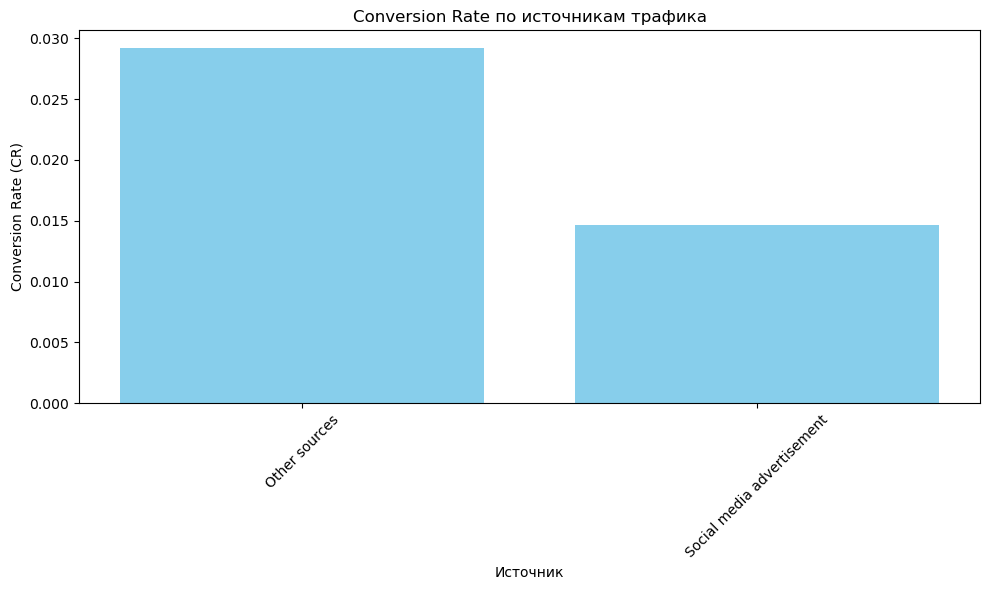

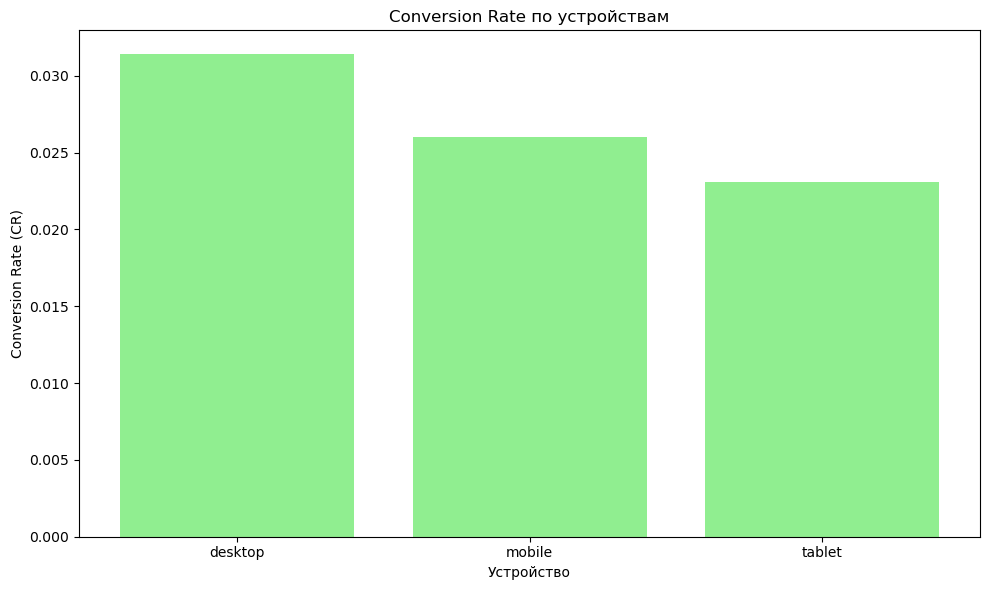

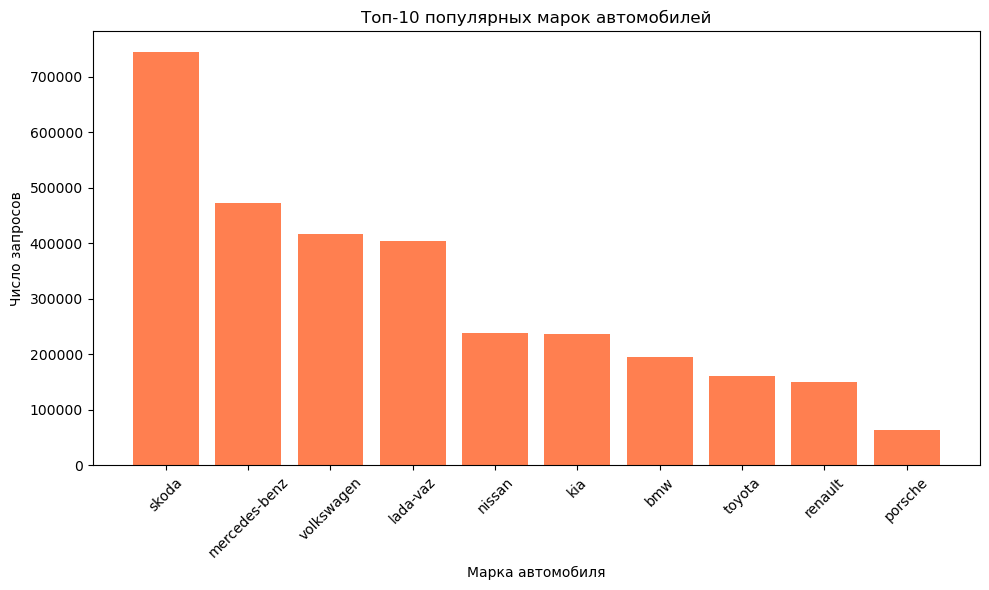

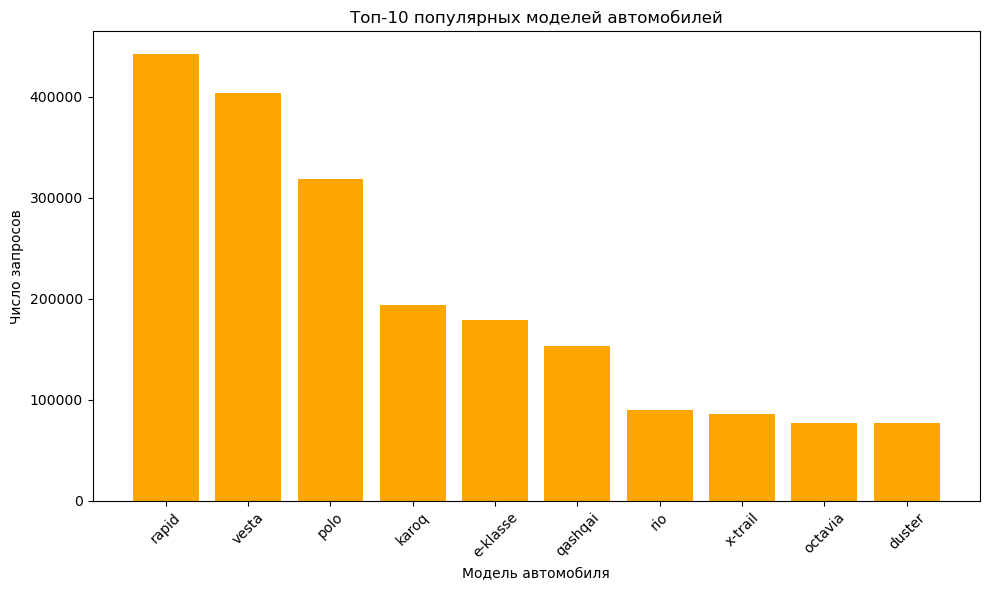

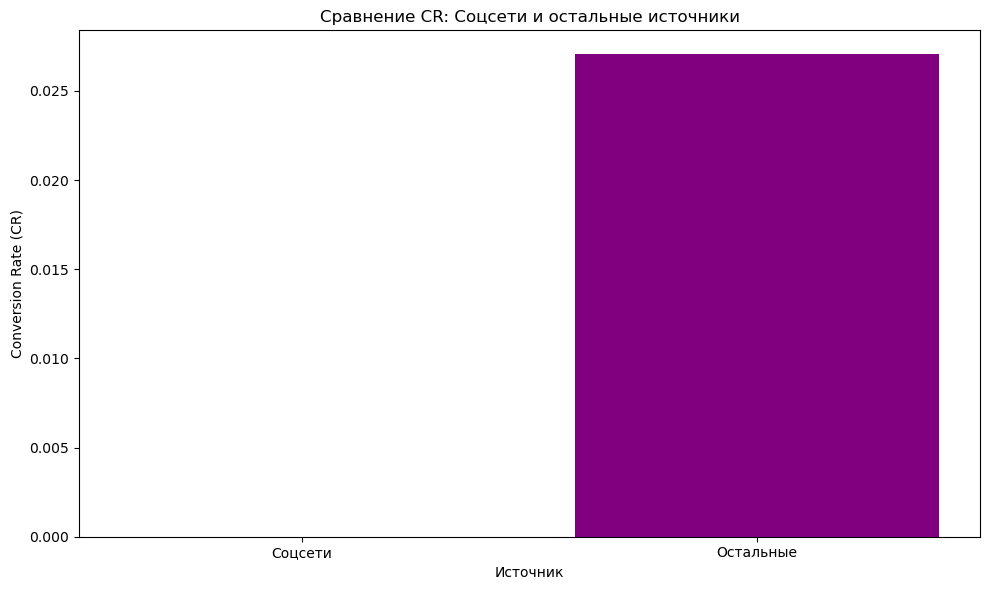

In [149]:
# 1. Источники трафика
def plot_traffic_sources(source_results_sorted):
    plt.figure(figsize=(10, 6))
    plt.bar(source_results_sorted['Источник'], source_results_sorted['CR'], color='skyblue')
    plt.title('Conversion Rate по источникам трафика')
    plt.ylabel('Conversion Rate (CR)')
    plt.xlabel('Источник')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2. Эффективность устройств
def plot_device_analysis(device_results_sorted):
    plt.figure(figsize=(10, 6))
    plt.bar(device_results_sorted['Устройство'], device_results_sorted['CR'], color='lightgreen')
    plt.title('Conversion Rate по устройствам')
    plt.ylabel('Conversion Rate (CR)')
    plt.xlabel('Устройство')
    plt.tight_layout()
    plt.show()

# 3. Популярные марки и модели автомобилей
def plot_car_brands_and_models(car_brand_demand, car_model_demand):
    # Top-10 brands
    plt.figure(figsize=(10, 6))
    plt.bar(car_brand_demand['car_brand'][:10], car_brand_demand['count'][:10], color='coral')
    plt.title('Топ-10 популярных марок автомобилей')
    plt.ylabel('Число запросов')
    plt.xlabel('Марка автомобиля')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Top-10 models
    plt.figure(figsize=(10, 6))
    plt.bar(car_model_demand['car_model'][:10], car_model_demand['count'][:10], color='orange')
    plt.title('Топ-10 популярных моделей автомобилей')
    plt.ylabel('Число запросов')
    plt.xlabel('Модель автомобиля')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Сравнение соцсетей и остальных источников
def plot_social_vs_other(comparison_df):
    plt.figure(figsize=(10, 6))
    plt.bar(comparison_df['Источник'], comparison_df['CR'], color='purple')
    plt.title('Сравнение CR: Соцсети и остальные источники')
    plt.ylabel('Conversion Rate (CR)')
    plt.xlabel('Источник')
    plt.tight_layout()
    plt.show()

# Передача обработанных данных для визуализации
plot_traffic_sources(source_results_sorted)
plot_device_analysis(device_results_sorted)
plot_car_brands_and_models(car_brand_demand, car_model_demand)
plot_social_vs_other(comparison_df)


# Этап 5: Финализация

Составить Jupyter Notebook:
- Включить весь код, графики и текстовые комментарии.
- Выводы по каждому этапу работы.

Проверить качество работы:
- Код должен быть понятным, структурированным.
- Гипотезы и ответы на вопросы команды должны быть обоснованы.

# Выводы

## Выводы по результатам анализа данных

1. Источники трафика
    - Наиболее целевой трафик приходит из "Other sources" с CR = 2.92%, что значительно выше, чем у рекламы в социальных сетях (CR = 1.47%).
    - Количество сессий из "Other sources" составляет 1,585,815, что в 6 раз превышает трафик из социальных сетей (274,227 сессий).

2. Кампании
   - Кампании с самым высоким CR (Conversion Rate) — "JkhCpeDGCtTwhwqWLywv" и "MHdHrBKQwbDaRalwnlJq" с CR = 100%. Однако эти кампании имеют лишь по одной сессии и одной конверсии.
   - Кампания "lndNIerCYECRQvBTyTye" демонстрирует стабильные показатели: CR = 27.38%, 23 конверсии, 84 сессии. Она показывает наиболее надёжное сочетание объёма и эффективности.

3. Устройства
    - Самое эффективное устройство по CR — desktop (3.13%), за ним следуют mobile (2.60%) и tablet (2.30%).
    - Несмотря на это, наибольшее количество трафика идёт с mobile устройств: 1,474,871 сессий и 38,379 конверсий. Это может быть связано с большей доступностью мобильных устройств.

5. Локации
    - Города с максимальным CR — Beaver Falls, Brescia, Gravesend и другие — имеют CR = 100%, но только по одной сессии и одной конверсии.
    - Такой результат не является статистически значимым. Важно учитывать локации с большим объёмом данных для более точных выводов.

6. Популярные марки и модели автомобилей
    - Топ-10 популярных марок:
        - Лидеры: Skoda (744,516 сессий), Mercedes-Benz (472,316 сессий), Volkswagen (417,128 сессий).
            - Эти бренды занимают лидирующие позиции по популярности среди пользователей.
    - Топ-10 популярных моделей:
        - Лидеры: Skoda Rapid (442,513 сессий), Lada Vesta (403,910 сессий), Volkswagen Polo (318,075 сессий).

7. Социальные сети
    - Реклама в социальных сетях показала нулевые результаты:
        - Сессий: 0
        - Конверсий: 0
        - CR: 0%
    - По сравнению с остальными источниками (CR = 2.71%), социальные сети не приносят целевого трафика.

8. Рекомендации:

- Увеличить инвестиции в источники с высоким CR:

- Источник "Other sources" показывает высокую конверсию и большой объём трафика.

- Уделить внимание наиболее успешным кампаниям, например, "lndNIerCYECRQvBTyTye".

- Фокус на устройства:

    - Мобильные устройства обеспечивают основной объём трафика. Рекомендуется адаптировать сайт под мобильные устройства, чтобы улучшить CR.

- Оценить целевые города:
    - Провести дополнительный анализ локаций с высоким CR и большим объёмом данных, чтобы определить ключевые регионы.

- Оптимизировать социальные сети:
    - Учитывая нулевые результаты, нужно пересмотреть стратегию рекламы в соцсетях или отказаться от неё в текущем виде.

- Популярные автомобили:
    - Увеличить акцент на продвижение популярных моделей:
        - Skoda Rapid,
        - Lada Vesta,
        - Volkswagen Polo.
    - Анализировать спрос на другие модели из топ-10.